In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
model=load_model('Malaria.model')

In [38]:
def detect_malaria(img):
    x=image.img_to_array(img)
    x.shape
    x=x/255.0
    reshaped=np.reshape(x,(1,224,224,3))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    if(label == 1):
        print("Uninfected")
    elif(label == 0):
        print("infected")

In [39]:
img=image.load_img('C:/Users/KIIT/Desktop/Malaria-Detection-master/Malaria_dataset/Train/uninfected/C1_thinF_IMG_20150604_104722_cell_60.PNG',target_size=(224,224))

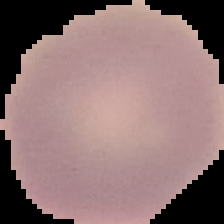

In [40]:
img

In [41]:
detect_mask(img)

Uninfected


In [42]:
img1=image.load_img('C:/Users/KIIT/Desktop/Malaria-Detection-master/Malaria_dataset/Train/Parasite/C33P1thinF_IMG_20150619_120645a_cell_217.PNG',target_size=(224,224))

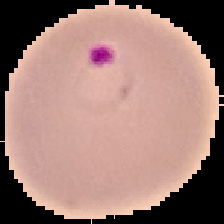

In [43]:
img1

In [44]:
detect_mask(img1)

infected


In [87]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

model = load_model('Malaria.model')
sample_images = [
                 ["59105133-e5f5f000-8950-11e9-9a09-b0b782a8305b.jpg"],
                 ["C33P1thinF_IMG_20150619_114756a_cell_181.PNG"],
                 ["C1_thinF_IMG_20150604_104722_cell_60.PNG"]
]

def classify_image(img):
    reshaped = img.reshape((1, 224,224, 3))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    print(label)
    if(label == 1):
        return ("PERSON IS NOT INFECTED BY MALARIA")
    elif(label == 0):
        return ("PERSON IS INFECTED BY MALARIA")

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(
    fn=classify_image, inputs=image, outputs=label, capture_session=True,
    title="Detecting malaria with deep learning",
    description= "Malaria is a blood disease caused by the Plasmodium parasites transmitted through the bite of female Anopheles mosquito. Microscopists commonly examine thick and thin blood smears to diagnose disease and compute parasitemia. However, their accuracy depends on smear quality and expertise in classifying and counting parasitized and uninfected cells.n contrast, Convolutional Neural Networks, a class of deep learning models promise highly scalable and superior results with end-to-end feature extraction and classification. Automated malaria screening using deep learning techniques could, therefore, serve as an effective diagnostic aid. In this study, we evaluate the performance of pre-trained models as feature extractors toward classifying parasitized and uninfected cells to aid in improved disease screening",
    examples=sample_images).launch();

Running locally at: http://127.0.0.1:7879/
To create a public link, set `share=True` in `launch()`.
Interface loading below...
